In [230]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

mta = pd.read_csv('awesome_company_multi_touch_report.csv',
                  delimiter=',')

#mta.action[6]
mta[0:15]

,Unnamed: 0,date,action,conversion_hash_id,conversion_key,new_to_file,timestamp_conv,total_events,sequence_number,event_id,...,hash_ip_events,uid,normalized,revenue_normalized,first_touch,revenue_first_touch,last_touch,revenue_last_touch,even,revenue_even
0,0,2020-01-17,action=conv.purchase,005a280dac8447267c4c439193aed874,2089092776011,0,2020-01-17 21:21:23,8,1,d7a4b1a66dc47949312dd1ea45d4782d,...,34f6d34c03466f83a1fa1ec7e57944f091a47612a3ee1b...,rbos-2575c49c-edf2-4705-a3f1-9864be0f0c07,0.088524,16.465505,1,186.0,0,0.0,0.125000,23.250000
1,1,2020-01-17,action=conv.purchase,005a280dac8447267c4c439193aed874,2089092776011,0,2020-01-17 21:21:23,8,2,14075938862dd161c46be7dbf397b51f,...,100e999f26e63c5c4255b7a90ee4c2f01b3d81c37ccf8c...,rbos-2575c49c-edf2-4705-a3f1-9864be0f0c07,0.130211,24.219214,0,0.0,0,0.0,0.125000,23.250000
2,2,2020-01-17,action=conv.purchase,005a280dac8447267c4c439193aed874,2089092776011,0,2020-01-17 21:21:23,8,3,e0468ba75d054d72a630a5aaf723e595,...,ad9199d825bbf7d2c92683e611e95ef46f2f4e86efe660...,rbos-2575c49c-edf2-4705-a3f1-9864be0f0c07,0.130211,24.219214,0,0.0,0,0.0,0.125000,23.250000
3,3,2020-01-17,action=conv.purchase,005a280dac8447267c4c439193aed874,2089092776011,0,2020-01-17 21:21:23,8,4,a71b757d9769477356c2e38f6faa3e75,...,4e6466282002838c3c8f6ba745876b8ecb3f09d13402ef...,rbos-2575c49c-edf2-4705-a3f1-9864be0f0c07,0.130211,24.219214,0,0.0,0,0.0,0.125000,23.250000
4,4,2020-01-17,action=conv.purchase,005a280dac8447267c4c439193aed874,2089092776011,0,2020-01-17 21:21:23,8,5,b3444dc7c0d839459273ef896068347f,...,ad9199d825bbf7d2c92683e611e95ef46f2f4e86efe660...,rbos-2575c49c-edf2-4705-a3f1-9864be0f0c07,0.130211,24.219214,0,0.0,0,0.0,0.125000,23.250000
5,5,2020-01-17,action=conv.purchase,005a280dac8447267c4c439193aed874,2089092776011,0,2020-01-17 21:21:23,8,6,ede297acc3577b49702857abb33b8535,...,134bff8e82a9ede611355bd021f22f4e25951a470c4248...,rbos-2575c49c-edf2-4705-a3f1-9864be0f0c07,0.130211,24.219214,0,0.0,0,0.0,0.125000,23.250000
6,6,2020-01-17,action=conv.purchase,005a280dac8447267c4c439193aed874,2089092776011,0,2020-01-17 21:21:23,8,7,0438ac1515287dd710b0fa30fb65c035,...,726cce5ad53385dd463198458a2950d9cd0e149a8ebe38...,rbos-2575c49c-edf2-4705-a3f1-9864be0f0c07,0.130211,24.219214,0,0.0,0,0.0,0.125000,23.250000
7,7,2020-01-17,action=conv.purchase,005a280dac8447267c4c439193aed874,2089092776011,0,2020-01-17 21:21:23,8,8,72d75cd01176532bb10a6ec317c7635f,...,726cce5ad53385dd463198458a2950d9cd0e149a8ebe38...,rbos-2575c49c-edf2-4705-a3f1-9864be0f0c07,0.130211,24.219214,0,0.0,1,186.0,0.125000,23.250000
8,8,2020-01-17,action=conv.purchase,1bcbb964b8e4b2ad5d8734cf6eba57f4,2088853667915,1,2020-01-17 18:44:30,7,1,e2882801c5958401964edb292328a56a,...,733d55fe7d9515ee82da659491c70928c6e56c3a9a0bd8...,1336478261610983331,0.186329,126.051546,1,676.5,0,0.0,0.142857,96.642857
9,9,2020-01-17,action=conv.purchase,1bcbb964b8e4b2ad5d8734cf6eba57f4,2088853667915,1,2020-01-17 18:44:30,7,2,11170b3e46038a482dab5c43700dd4f2,...,733d55fe7d9515ee82da659491c70928c6e56c3a9a0bd8...,1336478261610983331,0.186329,126.051546,0,0.0,0,0.0,0.142857,96.642857


In [2]:
def filter_and_copy(df, column_name, desired):
    """
    Gives a copy of the original dataframe filtered for the desired values with respect to a column.
    """
    filtered = df.copy()
    col = filtered[column_name]
    for value in col:
        if value != desired:
            filtered.drop([value], axis=0)
            
    return filtered

In [3]:
purchases = filter_and_copy(mta, 'action', 'action=conv.purchase')  # fitler for purchases

In [4]:
def different_entries(df, column_name):
    """
    Gives a list with all of the different possible values for the corresponding header from the MTA.
    """
    entries = []
    col = df[column_name]
    for value in col:
        if value not in entries:
            entries.append(value)
    
    return entries

In [5]:
t1_entries = different_entries(mta, 'tier_1')
t2_entries = different_entries(mta, 'tier_2')
t3_entries = different_entries(mta, 'tier_3')
t4_entries = different_entries(mta, 'tier_4')
t5_entries = different_entries(mta, 'tier_5')

In [6]:
def count_entries(df, column_name, entries):
    """
    Gives a dictionary of the amount of times an entry is repeated for the corresponding column_name.
    
    The entries parameter corresponds to a list created by different_entries.
    """
    dicti = {}
    col = df[column_name]
    for entry in entries:
        dicti[entry] = 0
        for value in col:
            if value == entry:
                dicti[entry] += 1
                
    return dicti

In [7]:
t1_count = count_entries(mta, 'tier_1', t1_entries)
#print(t1_count)

t2_count = count_entries(mta, 'tier_2', t2_entries)
#print(t2_count)

t3_count = count_entries(mta, 'tier_3', t3_entries)
#print(t3_count)

t4_count = count_entries(mta, 'tier_4', t4_entries)
#print(t4_count)

t5_count = count_entries(mta, 'tier_5', t5_entries)
#print(t5_count)

In [8]:
%matplotlib inline

In [36]:
def add_numbers(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

## Channels

<Figure size 432x288 with 0 Axes>

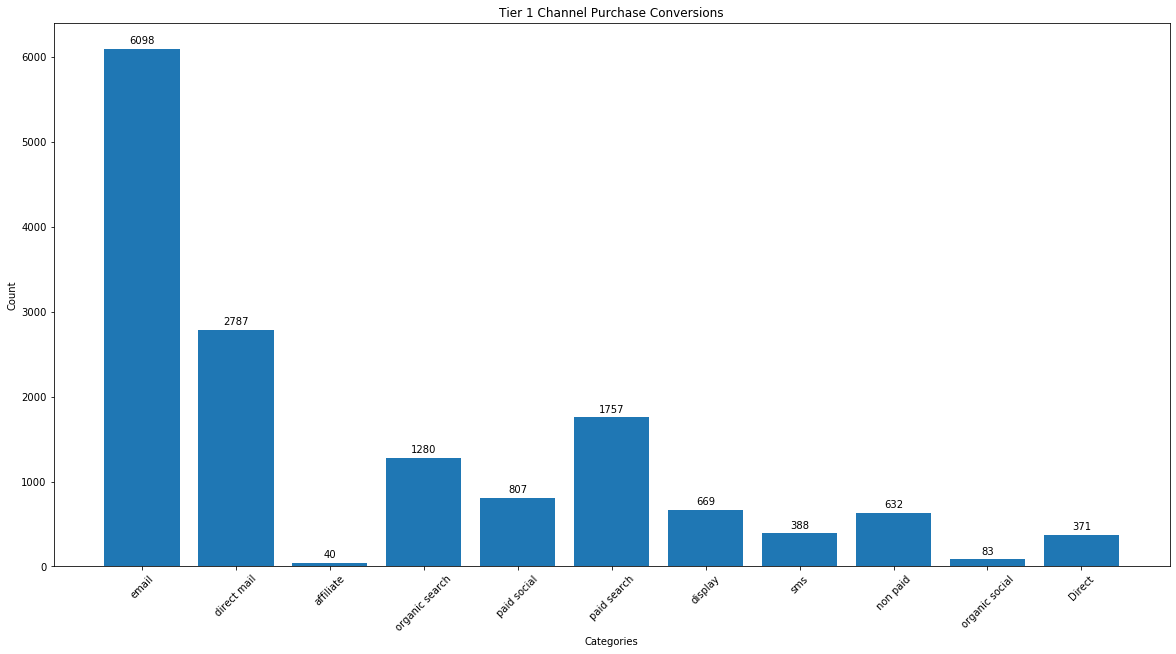

In [48]:
plt.figure()

f, ax = plt.subplots(figsize=(20,10)) # (width, height)
t1_bar = ax.bar(range(len(t1_count)), t1_count.values())
ax.set_xticks(range(len(t1_count)))
ax.set_xticklabels(t1_count.keys(), rotation=45)
ax.set_title('Tier 1 Channel Purchase Conversions')
ax.set_xlabel('Categories')
ax.set_ylabel('Count')
add_numbers(t1_bar)
plt.show()

<Figure size 432x288 with 0 Axes>

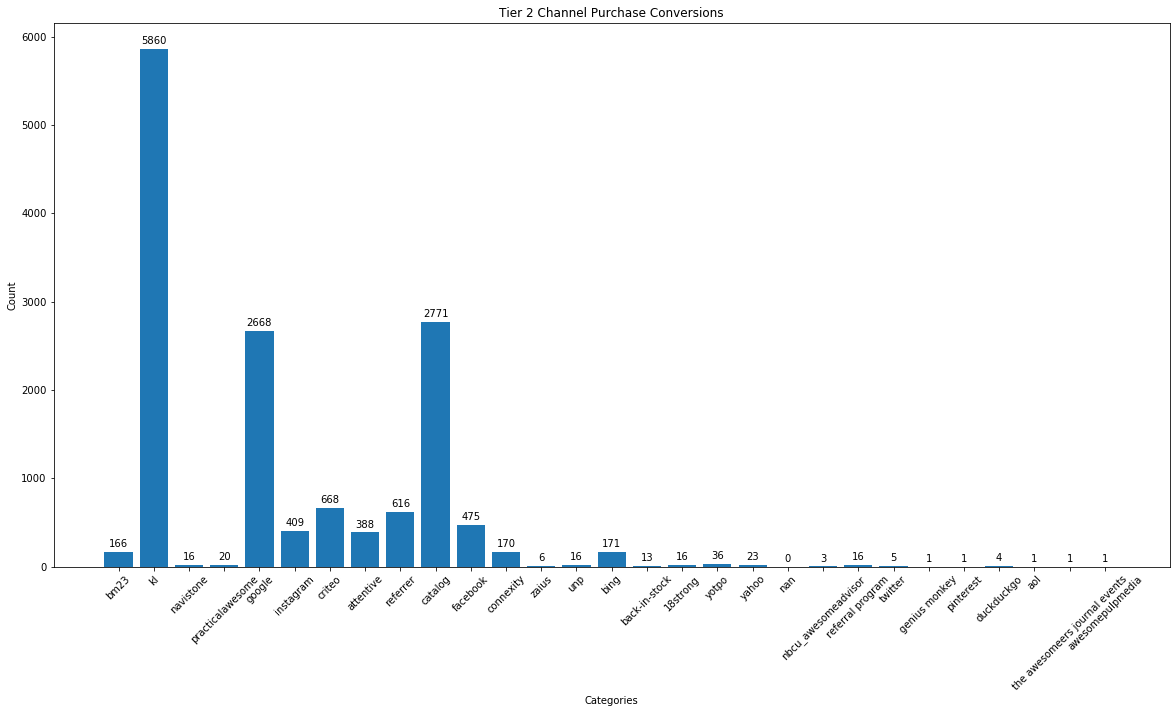

In [49]:
plt.figure()
f, ax = plt.subplots(figsize=(20,10)) # (width, height)
t2_bar = ax.bar(range(len(t2_count)), t2_count.values())
ax.set_xticks(range(len(t2_count)))
ax.set_xticklabels(t2_count.keys(), rotation=45)
ax.set_title('Tier 2 Channel Purchase Conversions')
ax.set_xlabel('Categories')
ax.set_ylabel('Count')
add_numbers(t2_bar)
plt.show()

In [330]:
def get_key(dicti, val):
    for key, value in dicti.items(): 
         if val == value: 
             return key

<Figure size 432x288 with 0 Axes>

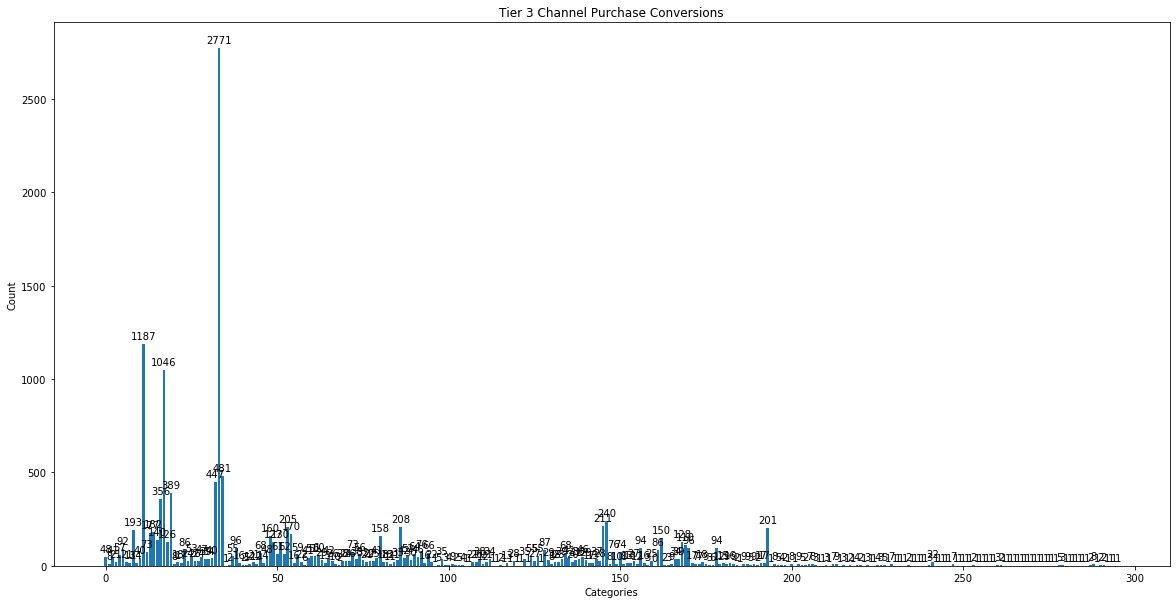

house


In [331]:
plt.figure()

f, ax = plt.subplots(figsize=(20,10)) # (width, height)
t3_bar = ax.bar(range(len(t3_count)), t3_count.values())
#plt.xticks(range(len(t3_count)), t3_count.keys(), rotation=45) only commented out because there are so many labels
ax.set_title('Tier 3 Channel Purchase Conversions')
ax.set_xlabel('Categories')
ax.set_ylabel('Count')
add_numbers(t3_bar)
plt.show()

print(get_key(t3_count, max(t3_count.values())))


<Figure size 432x288 with 0 Axes>

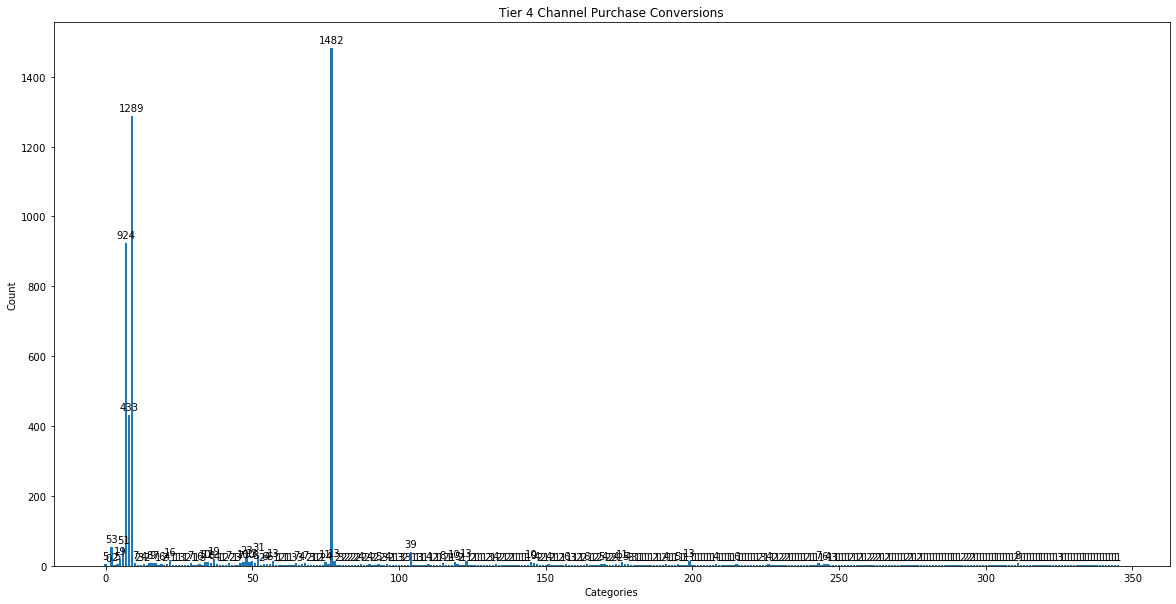

awesome_company early spring drop 2 2020


In [332]:
plt.figure()

f, ax = plt.subplots(figsize=(20,10)) # (width, height)
t4_bar = ax.bar(range(len(t4_count)), t4_count.values())
#plt.xticks(range(len(t4_count)), t4_count.keys(), rotation=45) only commented out because there are so many labels
ax.set_title('Tier 4 Channel Purchase Conversions')
ax.set_xlabel('Categories')
ax.set_ylabel('Count')
add_numbers(t4_bar)
plt.show()

print(get_key(t4_count, max(t4_count.values())))


<Figure size 432x288 with 0 Axes>

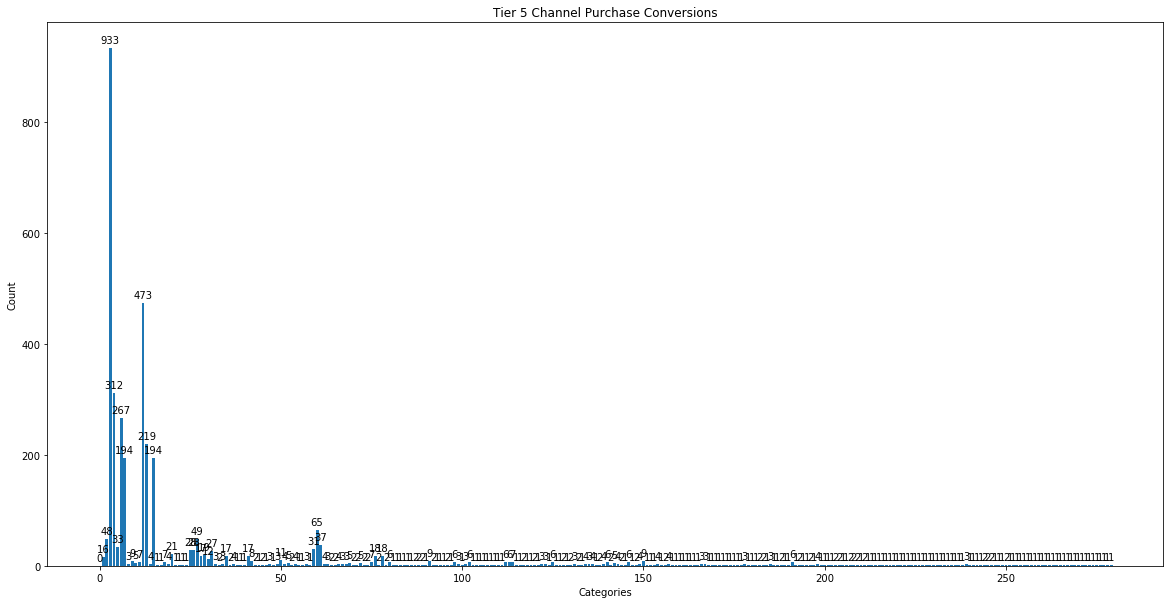

buyers -0-3m 2x+


In [333]:
plt.figure()

f, ax = plt.subplots(figsize=(20,10)) # (width, height)
t5_bar = ax.bar(range(len(t5_count)), t5_count.values())
#plt.xticks(range(len(t5_count)), t5_count.keys(), rotation=45) only commented out because there are so many labels
ax.set_title('Tier 5 Channel Purchase Conversions')
ax.set_xlabel('Categories')
ax.set_ylabel('Count')
add_numbers(t5_bar)
plt.show()

print(get_key(t5_count, max(t5_count.values())))


## Models

In [27]:
first_touch = mta[mta['first_touch'] == 1]

last_touch = mta[mta['last_touch'] == 1]

even = mta[mta['even'] == 1]

model_count_list = [np.size(first_touch), np.size(last_touch), np.size(even)]

<Figure size 432x288 with 0 Axes>

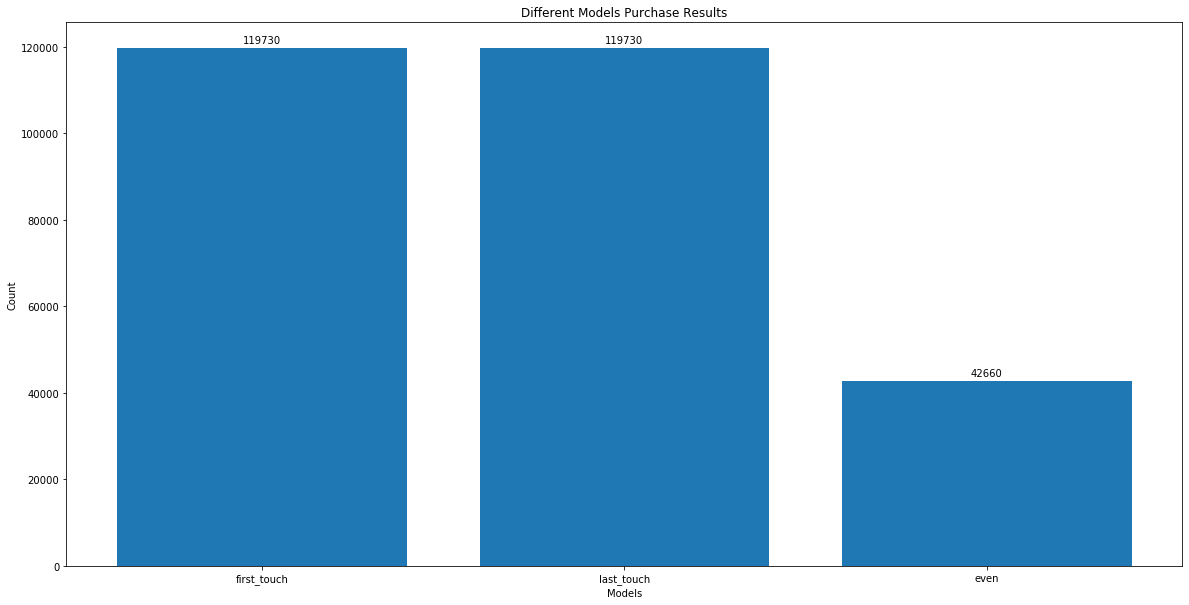

In [53]:
plt.figure()

f, ax = plt.subplots(figsize=(20,10)) # (width, height)
models_bar = ax.bar(range(len(model_count_list)), model_count_list)
ax.set_xticks(range(len(model_count_list)))
ax.set_xticklabels(['first_touch', 'last_touch', 'even'])
ax.set_title('Different Models Purchase Results')
ax.set_xlabel('Models')
ax.set_ylabel('Count')
add_numbers(models_bar)
plt.show()

## Time

### How long does it take each customer to purchase after interacting with a given marketing channel?

In [300]:
# list of all users
users = different_entries(mta, 'uid')
events = different_entries(mta, 'total_events')

'''
# need to subtract first event timestamp from last event timestamp
event_dict_per_user = {}
for user in users:
    event_dict_per_user[user] = (mta[mta['uid'] == user][['timestamp_events', 'total_events']])
    # creates dict with uid as
'''    

event_list_per_user = []
# creates list of dataframes per user
for user in users:
    for event in events:
        add = mta[(mta['uid'] == user) & (mta['total_events'] == event)][['uid', 'timestamp_events', 'total_events', 'sequence_number', 'tier_1', 'new_to_file']]
        if add.empty == False:
            event_list_per_user.append(add)
    
event_list_per_user

[                                         uid     timestamp_events  \
 0  rbos-2575c49c-edf2-4705-a3f1-9864be0f0c07  2019-04-25 15:16:57   
 1  rbos-2575c49c-edf2-4705-a3f1-9864be0f0c07  2019-07-19 14:32:32   
 2  rbos-2575c49c-edf2-4705-a3f1-9864be0f0c07  2019-07-22 15:19:45   
 3  rbos-2575c49c-edf2-4705-a3f1-9864be0f0c07  2019-08-02 16:15:32   
 4  rbos-2575c49c-edf2-4705-a3f1-9864be0f0c07  2019-08-18 02:48:13   
 5  rbos-2575c49c-edf2-4705-a3f1-9864be0f0c07  2019-08-30 20:38:55   
 6  rbos-2575c49c-edf2-4705-a3f1-9864be0f0c07  2019-09-15 05:00:59   
 7  rbos-2575c49c-edf2-4705-a3f1-9864be0f0c07  2019-09-18 15:52:51   
 
    total_events  sequence_number tier_1  new_to_file  
 0             8                1  email            0  
 1             8                2  email            0  
 2             8                3  email            0  
 3             8                4  email            0  
 4             8                5  email            0  
 5             8                

In [221]:
def to_time(tse):
    '''
    Converts a "timestamp_events" string to seconds.
    '''
    s_year = 3.154e7  # seconds in a year
    s_month = 2.628e6  # seconds in a month
    s_day = 86400    # seconds in a day
    s_hour = 3600     # seconds in an hour
    s_minute = 60       # seconds in a minute
    tse = tse.split(' ')
    ymd = tse[0].split('-')
    ymd = list(map(int, ymd)) 
    hms = tse[1].split(':')
    hms = list(map(int, hms))
    final = (ymd[0] * s_year) + (ymd[1] * s_month) + (ymd[2] * s_day) + (hms[0] * s_hour) + (hms[1] * s_minute) + hms[2]
    
    return final

In [304]:
# total_events is number of events leading up to conversion which is denoted by action, even if the row does
# not correspond to the final 

# can count each value to get the total_events number and then reset counter

counter = 1
dcounter = 0
time = 0
uid_time = pd.DataFrame(columns = ['uid', 'time_to_purchase', 'total_events', 'path', 'new_to_file'])


for df in event_list_per_user:
    path = []
    df.sort_values('sequence_number') # sorts the data frame
    for i in range(len(df)):
        path.append(df['tier_1'].iat[i])
        if df['sequence_number'].iat[i] == 1:
            fst = to_time(df.iat[i, 1])
        if df['sequence_number'].iat[i] == (df['total_events'].iat[i]):
            lst = to_time(df.iat[i, 1])
            te = df['total_events'].iat[i]
            time = lst - fst
    path.append('purchase') # as the example shows  
    path_str = ''.join(path)
    uid_time = uid_time.append({'uid': df.iat[0, 0], 'time_to_purchase': time, 'total_events': te, 'path': path_str, 'new_to_file': df['new_to_file'].iat[0]}, ignore_index=True)

uid_time
    

,uid,time_to_purchase,total_events,path,new_to_file
0,rbos-2575c49c-edf2-4705-a3f1-9864be0f0c07,12537354.0,8,emailemailemailemailemailemailemailemailpurchase,0
1,1336478261610983331,22784652.0,7,emailemailemaildirect mailaffiliateaffiliateor...,1
2,1336478261610983331,24522824.0,16,emailemailemailemailemailemailorganic searchor...,0
3,rbos-1cd08b65-e039-43b9-91ed-b66ae3539c5e,22930025.0,10,emailemailemailemailemailpaid socialpaid searc...,0
4,rbos-0be3d4f2-083a-4441-a620-cbce1b8c420b,22968086.0,30,emailemailemailemailemailemailemailemailemaile...,0
...,...,...,...,...,...
3880,8641810328977473424,0.0,1,Directpurchase,1
3881,rbos-ddf4e2ae-b69a-4d99-99e0-59f939d98639,0.0,1,Directpurchase,1
3882,rbos-056c7b6d-f377-4f93-a970-9776fc95d894,0.0,1,Directpurchase,0
3883,rbos-bda68917-6c06-4ad6-a381-d584e6a24e62,0.0,1,Directpurchase,1


### Common Path to Purchase

In [306]:
diff_paths = different_entries(uid_time, 'path')
diff_paths_str = []
common_paths = pd.DataFrame(columns = ['path', 'freq'])

for i in range(len(diff_paths)):
    diff_paths_str.append(''.join(diff_paths[i]))

    
for path in range(len(diff_paths_str)):
    size = np.size(uid_time[(uid_time['path']) == diff_paths_str[path]])
    common_paths = common_paths.append({'path': diff_paths[path], 'freq': size}, ignore_index=True)             

common_paths.sort_values('freq', ascending=False).head()

,path,freq
102,Directpurchase,1720
95,direct mailpurchase,1195
83,paid searchpurchase,1170
106,organic searchpurchase,835
96,direct maildirect mailpurchase,630


## Growth

 - look at which paths drove the most new customers
     - invest in those channels
 - look at which paths drove the most purchases
     - invest in those channels
 - could provide how much money they are spending per channel so that we could figure out the best way to reallocate funds. some paths are clearly working while some are not, so why even spend money in the paths that are not?

In [321]:
new_user_common_paths = pd.DataFrame(columns = ['path', 'freq'])
for path in range(len(diff_paths_str)):
    size = np.size(uid_time[(uid_time['path'] == diff_paths_str[path]) & (uid_time['new_to_file'] == 1)])
    if size > 0:
        new_user_common_paths = new_user_common_paths.append({'path': diff_paths[path], 'freq': size}, ignore_index=True)  

In [322]:
new_user_common_paths.sort_values('freq', ascending=False)[1:15]

,path,freq
20,paid searchpurchase,915
37,organic searchpurchase,635
39,smspurchase,365
4,emailpurchase,335
14,paid socialpurchase,300
40,non paidpurchase,135
29,direct mailpurchase,135
23,paid searchsmspurchase,125
17,paid socialpaid socialpurchase,125
49,organic searchpaid searchpurchase,100
